          S.No.  No. of eligible families  Eligible families with Aadhar  \
count  50.00000                 50.000000                      50.000000   
mean   25.50000             234168.980000                   89473.820000   
std    14.57738              87076.521953                   48876.053589   
min     1.00000              75015.000000                   12943.000000   
25%    13.25000             177867.250000                   57956.250000   
50%    25.50000             226426.000000                   83802.000000   
75%    37.75000             276353.000000                  118532.750000   
max    50.00000             455390.000000                  193530.000000   

       Eligible families without Aadhar  \
count                         50.000000   
mean                      144695.160000   
std                        64792.605946   
min                        13154.000000   
25%                       109081.500000   
50%                       132597.500000   
75%           

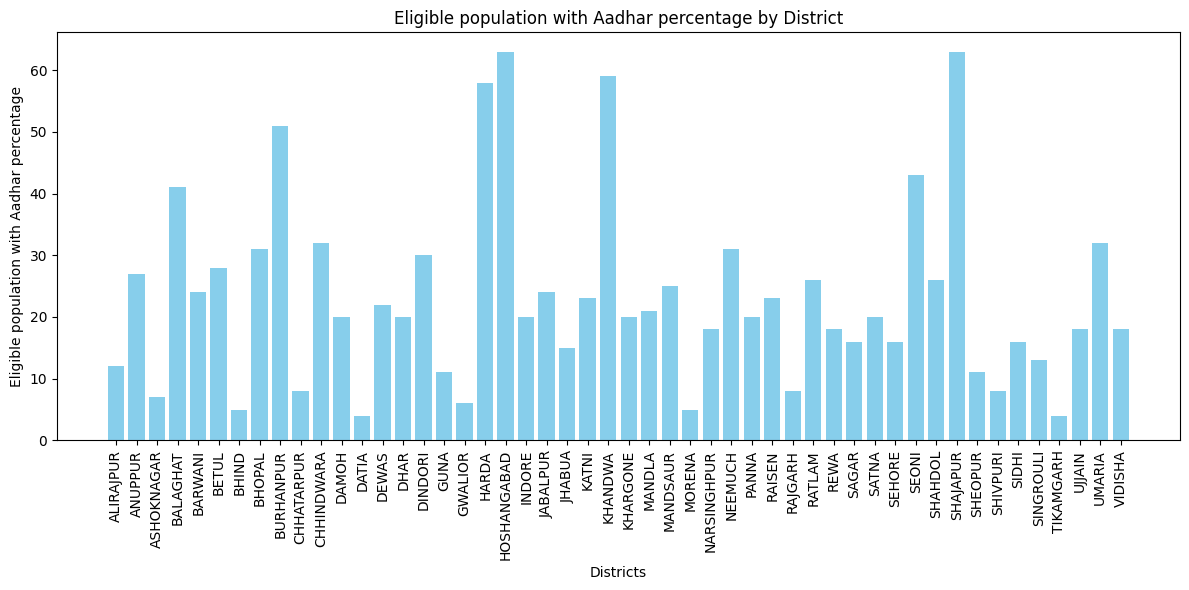

Perceptron classification accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



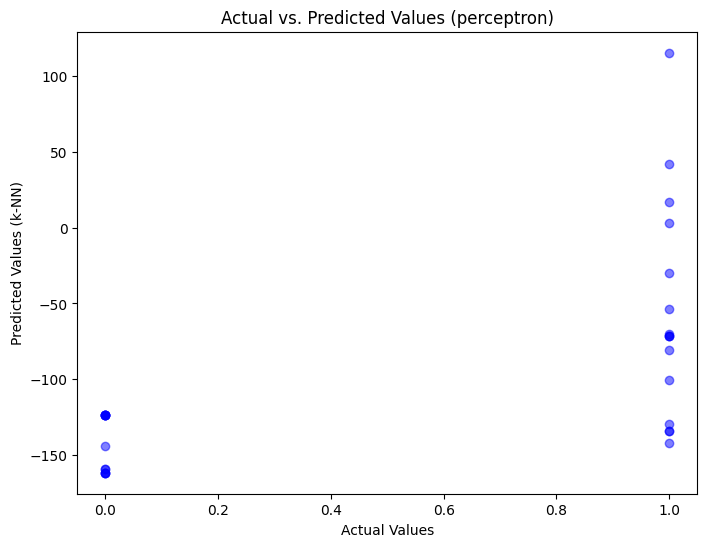

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



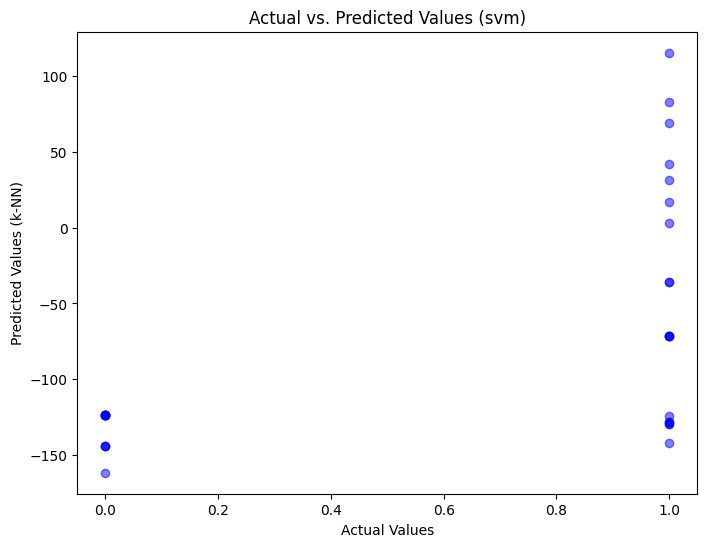

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        75
           1       1.00      0.92      0.96        75

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



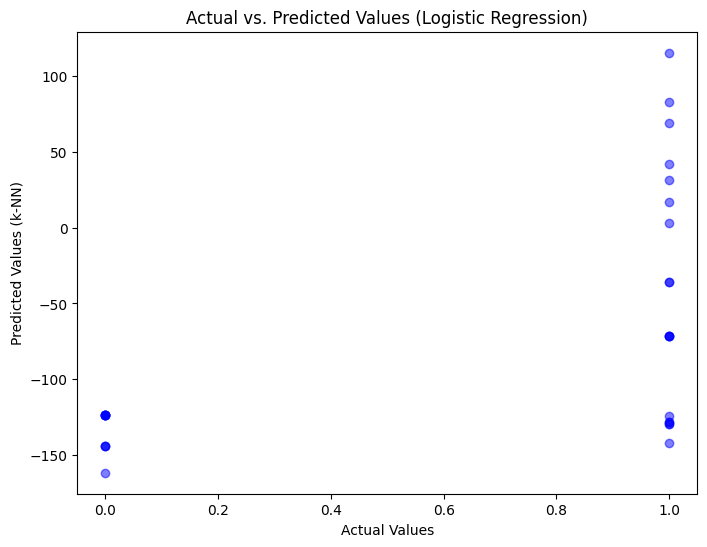

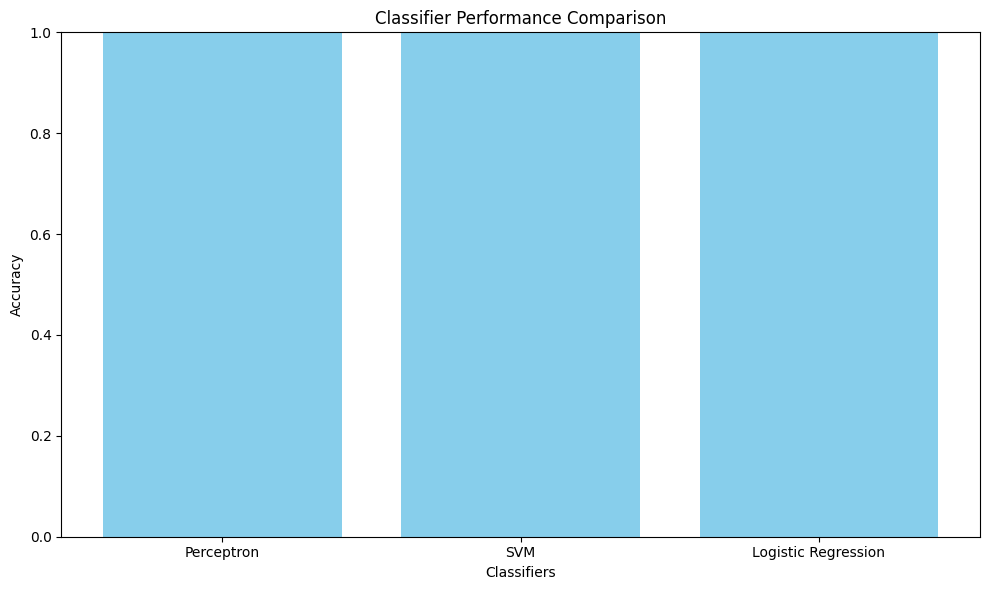

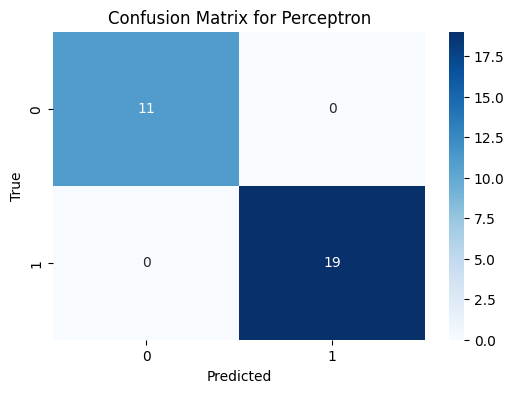

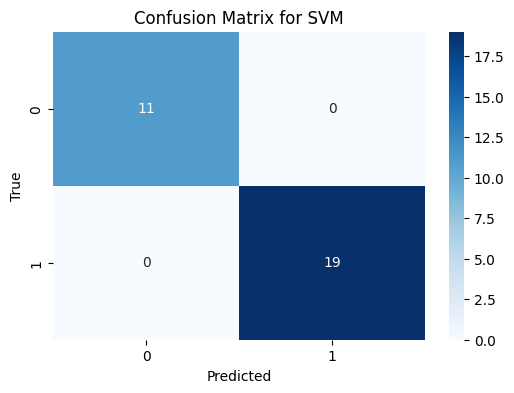

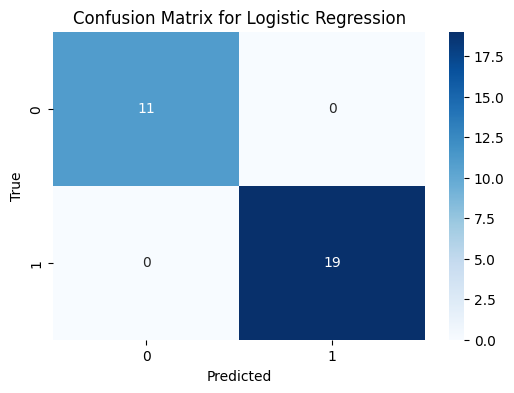

RIDGE REGRESSION RESULTS:
Mean Squared Error (Bootstrap): 0.014447741915176102
Mean Absolute Error (Bootstrap): 0.09810117762232386
R-squared Error (Bootstrap): 0.9422090323392954
LASSO REGRESSION RESULTS:
Mean Squared Error (Bootstrap): 0.07289792898120197
Mean Absolute Error (Bootstrap): 0.2621662613694186
R-squared Error (Bootstrap): 0.7084082840751921


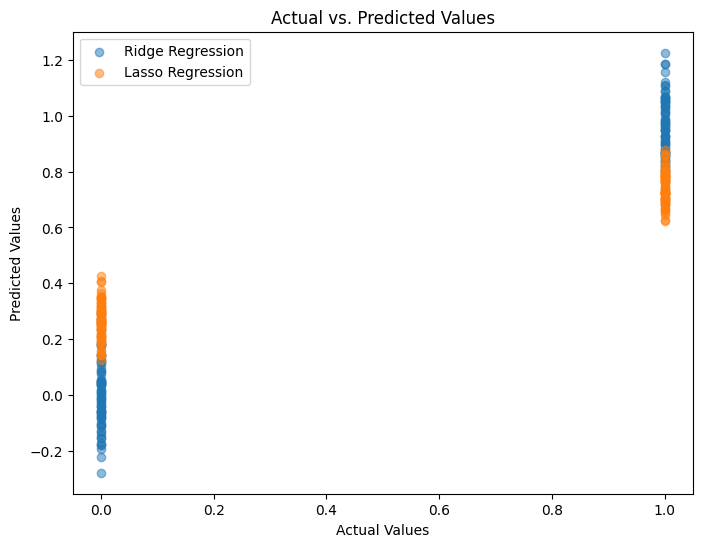

k-NN Regression Results:
Mean Squared Error: 892.9409909151974
Mean Absolute Error: 20.476592154901127
R-squared Error: 0.9412303343796538


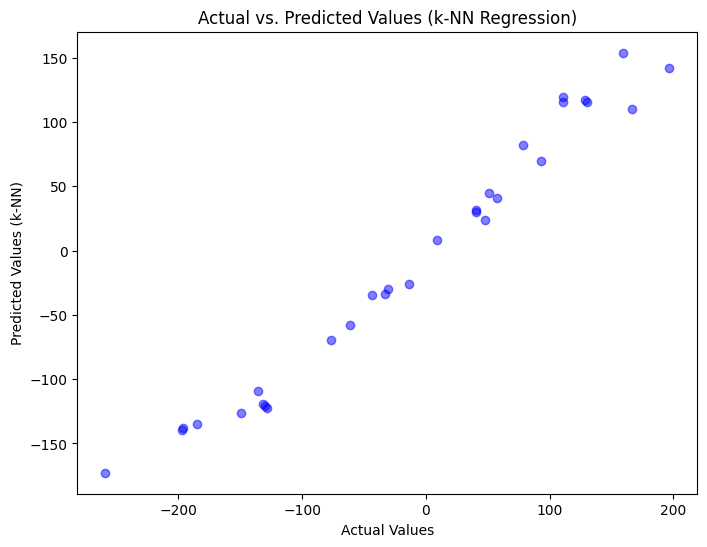

In [8]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, Ridge, Lasso
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.linear_model import LogisticRegression

# Load your data
data = pd.read_csv('/content/Aadhaar_Seeding_Status_MP_29_05_2015.csv')

# Data exploration
description = data.describe()
print(description)
shape = data.shape
print(shape)

# Data visualization
districts = data['District']
aadhar_percentage = data['Eligible population with Aadhar percentage']

plt.figure(figsize=(12, 6))
plt.bar(districts, aadhar_percentage, color='skyblue')
plt.xlabel('Districts')
plt.ylabel('Eligible population with Aadhar percentage')
plt.title('Eligible population with Aadhar percentage by District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

data = data.drop(columns=['District'])

# Classification using Perceptron
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Perceptron classification accuracy:", accuracy)
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
y_pred_knn = knn_regressor.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (k-NN)")
plt.title("Actual vs. Predicted Values (perceptron)")
plt.show()

# Classification using Support Vector Machine (SVM)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
y_pred_knn = knn_regressor.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (k-NN)")
plt.title("Actual vs. Predicted Values (svm)")
plt.show()

# Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0

    for epoch in range(num_epochs):
        linear = np.dot(X, weights) + bias
        y_pred = sigmoid(linear)

        dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / num_samples) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

learning_rate = 0.01
num_epochs = 1000
weights, bias = logistic_regression(X, y, learning_rate, num_epochs)
y_pred = sigmoid(np.dot(X, weights) + bias)
y_pred = (y_pred > 0.5).astype(int)
report = classification_report(y, y_pred)
print("Logistic Regression Classification Report:")
print(report)
y_pred_knn = knn_regressor.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (k-NN)")
plt.title("Actual vs. Predicted Values (Logistic Regression)")
plt.show()

# Confusion matrices and classifier performance comparison
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
perceptron.fit(X_train, y_train)
predictions_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, predictions_perceptron)
confusion_perceptron = confusion_matrix(y_test, predictions_perceptron)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
confusion_svm = confusion_matrix(y_test, predictions_svm)

logistic_regression = LogisticRegression(max_iter=1000, random_state=0)
logistic_regression.fit(X_train, y_train)
predictions_logistic = logistic_regression.predict(X_test)
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
confusion_logistic = confusion_matrix(y_test, predictions_logistic)

classifiers = ["Perceptron", "SVM", "Logistic Regression"]
accuracies = [accuracy_perceptron, accuracy_svm, accuracy_logistic]
confusion_matrices = [confusion_perceptron, confusion_svm, confusion_logistic]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

for i, classifier in enumerate(classifiers):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {classifier}')
    plt.show()

# Ridge and Lasso Regression with Bootstrapping
X, y = datasets.make_blobs(
    n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
)
n_bootstrap_samples = 100

mse_bootstrap_ridge = np.zeros(n_bootstrap_samples)
mae_bootstrap_ridge = np.zeros(n_bootstrap_samples)
r2_bootstrap_ridge = np.zeros(n_bootstrap_samples)

mse_bootstrap_lasso = np.zeros(n_bootstrap_samples)
mae_bootstrap_lasso = np.zeros(n_bootstrap_samples)
r2_bootstrap_lasso = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    indices = np.random.choice(len(X), size=len(X), replace=True)
    X_resampled = X[indices]
    y_resampled = y[indices]

    alpha_ridge = 1.0
    ridge = Ridge(alpha=alpha_ridge)
    ridge.fit(X_resampled, y_resampled)

    alpha_lasso = 1.0
    lasso = Lasso(alpha=alpha_lasso)
    lasso.fit(X_resampled, y_resampled)

    y_pred_ridge = ridge.predict(X)
    y_pred_lasso = lasso.predict(X)

    mse_bootstrap_ridge[i] = mean_squared_error(y, y_pred_ridge)
    mae_bootstrap_ridge[i] = mean_absolute_error(y, y_pred_ridge)
    r2_bootstrap_ridge[i] = r2_score(y, y_pred_ridge)

    mse_bootstrap_lasso[i] = mean_squared_error(y, y_pred_lasso)
    mae_bootstrap_lasso[i] = mean_absolute_error(y, y_pred_lasso)
    r2_bootstrap_lasso[i] = r2_score(y, y_pred_lasso)

mean_mse_ridge = np.mean(mse_bootstrap_ridge)
mean_mae_ridge = np.mean(mae_bootstrap_ridge)
mean_r2_ridge = np.mean(r2_bootstrap_ridge)

mean_mse_lasso = np.mean(mse_bootstrap_lasso)
mean_mae_lasso = np.mean(mae_bootstrap_lasso)
mean_r2_lasso = np.mean(r2_bootstrap_lasso)

print("RIDGE REGRESSION RESULTS:")
print(f"Mean Squared Error (Bootstrap): {mean_mse_ridge}")
print(f"Mean Absolute Error (Bootstrap): {mean_mae_ridge}")
print(f"R-squared Error (Bootstrap): {mean_r2_ridge}")

print("LASSO REGRESSION RESULTS:")
print(f"Mean Squared Error (Bootstrap): {mean_mse_lasso}")
print(f"Mean Absolute Error (Bootstrap): {mean_mae_lasso}")
print(f"R-squared Error (Bootstrap): {mean_r2_lasso}")

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_ridge, alpha=0.5, label='Ridge Regression')
plt.scatter(y, y_pred_lasso, alpha=0.5, label='Lasso Regression')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

from sklearn.neighbors import KNeighborsRegressor

# Load your data or generate a synthetic dataset for regression
# For example, generate a synthetic dataset
X, y = datasets.make_regression(n_samples=150, n_features=2, noise=0.1, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize and train the k-NN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors.
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_regressor.predict(X_test)

# Calculate the evaluation metrics
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("k-NN Regression Results:")
print(f"Mean Squared Error: {mse_knn}")
print(f"Mean Absolute Error: {mae_knn}")
print(f"R-squared Error: {r2_knn}")

y_pred_knn = knn_regressor.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (k-NN)")
plt.title("Actual vs. Predicted Values (k-NN Regression)")
plt.show()